In [76]:
#importing librairies
import graphviz 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()  # for plot styling
import string
import io
import sklearn as sk #import tree 
from sklearn.model_selection import train_test_split
import sklearn.tree as skt#import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering 
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans


In [77]:
#importing the csv file and cleaning up our data
data = pd.read_csv('./CC GENERAL.csv')
df2 = data.dropna(axis=0,inplace=False,how='any')
df2 = df2.drop('CUST_ID',axis=1)
data = df2
data


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [78]:
model=  AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric
agglomerative=pd.DataFrame(clust_labels)
agglomerative


,0
0,0
1,0
2,0
3,0
4,0
...,...
8631,0
8632,0
8633,0
8634,0


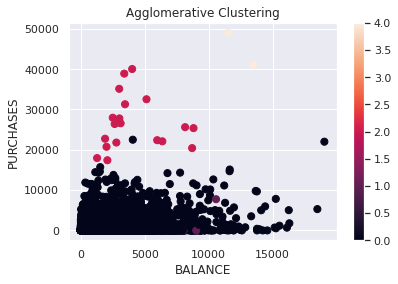

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ["PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

In [80]:
kmeans=KMeans(n_clusters=10, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)
labels = pd.DataFrame(kmeans.labels_)
labels
kmeans.predict(data)
print(kmeans.cluster_centers_)

[[7.81663637e+02 8.73052423e-01 4.74316781e+02 2.24938138e+02
  2.49609841e+02 4.25112785e+02 4.49446858e-01 1.24042329e-01
  3.46412229e-01 1.08431890e-01 2.18341815e+00 9.07845632e+00
  2.01298146e+03 8.34724182e+02 4.78101178e+02 1.47739695e-01
  1.13736217e+01]
 [8.58884077e+02 8.86158102e-01 1.34220260e+03 7.74879460e+02
  5.67834076e+02 1.78987332e+02 6.50825900e-01 3.41636348e-01
  4.62532738e-01 4.66286234e-02 8.55459057e-01 2.08492556e+01
  6.07468137e+03 1.53036315e+03 3.47584655e+02 2.46479510e-01
  1.18368486e+01]
 [8.00557660e+03 9.89160041e-01 1.12910478e+03 6.71300619e+02
  4.58001652e+02 4.39355949e+03 4.08499442e-01 2.09175794e-01
  3.12480280e-01 3.81851705e-01 1.09675516e+01 1.81474926e+01
  1.19390855e+04 3.21177974e+03 2.67448862e+03 4.17671386e-03
  1.17020649e+01]
 [5.08567638e+03 8.70520678e-01 1.61351078e+03 9.24729778e+02
  6.89025444e+02 1.16868659e+04 3.77910033e-01 2.10978822e-01
  3.04954322e-01 4.86435778e-01 2.05888889e+01 2.10111111e+01
  1.08938889e+04

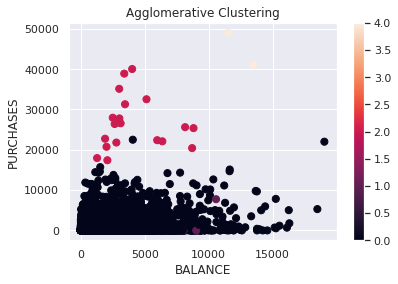

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ["PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

In [82]:
"""plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))"""

'plt.figure(figsize=(10,7))\nplt.title("Dendrograms")\ndend=shc.dendrogram(shc.linkage(data, method="complete"))'

In [83]:
"""
g = sns.PairGrid(data)
g.map(sns.scatterplot);
"""

'\ng = sns.PairGrid(data)\ng.map(sns.scatterplot);\n'

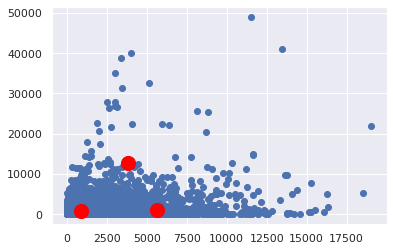

In [84]:
# Visualize the correlation your data and identify variables for further analysis
X = np.array(data.loc[:,['BALANCE',                # Choose your variable names
                       'PURCHASES']])    \
                        .reshape(-1, 2)
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X)


# Plot the data
plt.scatter(X[:,0], 
            X[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

In [ ]:
""" K-means clustering a simply a division of the set of data objects into non-overlapping clusters such that each  data object is in exactly 
one subset) whereas A hierarchical clustering is a set of nested clusters that are arranged as a tree. """